In [3]:
import numpy as np
import pandas as pd
from PIL import Image
import io


In [13]:
# Load the CSV data
csv_data = '''
class_name,label_key,has_instance,hex
undefined,0,0,#000000
traffic_cone,1,0,#ffff00
snow,2,0,#d157a0
cobble,3,0,#ff34ff
obstacle,4,0,#ff4a46
leaves,5,0,#008941
street_light,6,1,#006fa6
bikeway,7,0,#a30059
ego_vehicle,8,0,#ffdbe5
pedestrian_crossing,9,0,#7a4900
road_block,10,1,#0000a6
road_marking,11,0,#63ffac
car,12,1,#b79762
bicycle,13,1,#004d43
person,14,1,#8fb0ff
bus,15,1,#997d87
forest,16,0,#5a0007
bush,17,0,#809693
moss,18,0,#b4a8bd
traffic_light,19,1,#1b4400
motorcycle,20,1,#4fc601
sidewalk,21,0,#3b5dff
curb,22,0,#4a3b53
asphalt,23,0,#ff2f80
gravel,24,0,#61615a
boom_barrier,25,1,#34362d
rail_track,26,0,#6b7900
tree_crown,27,0,#00c2a0
tree_trunk,28,1,#ffaa92
debris,29,0,#886f4c
crops,30,0,#0086ed
soil,31,0,#d16100
rider,32,1,#ddefff
animal,33,1,#000035
truck,34,1,#7b4f4b
on_rails,35,1,#a1c299
caravan,36,1,#300018
trailer,37,1,#0aa6d8
building,38,0,#013349
wall,39,0,#00846f
rock,40,1,#372101
fence,41,0,#ffb500
guard_rail,42,0,#c2ffed
bridge,43,0,#a079bf
tunnel,44,0,#cc0744
pole,45,1,#c0b9b2
traffic_sign,46,1,#c2ff99
misc_sign,47,1,#001e09
barrier_tape,48,0,#bec459
kick_scooter,49,1,#6f0062
low_grass,50,0,#0cbd66
high_grass,51,0,#eec3ff
scenery_vegetation,52,0,#456d75
sky,53,0,#b77b68
water,54,0,#7a87a1
wire,55,0,#ff8c00
outlier,56,0,#788d66
heavy_machinery,57,1,#fad09f
container,58,1,#ff8a9a
hedge,59,0,#d157a0
barrel,60,1,#d0d000
pipe,61,0,#dd0000
tree_root,62,0,#c4a484
military_vehicle,63,1,#404040
'''
# Reading the CSV data into a DataFrame
csv_df = pd.read_csv(io.StringIO(csv_data.strip()))

In [14]:
# Create a dictionary mapping label_key to RGB values
label_to_rgb = {row['label_key']: tuple(int(row['hex'][i:i+2], 16) for i in (1, 3, 5)) for _, row in csv_df.iterrows()}


In [59]:
# Load the PNG image
path = 'static/images/gallery/16_speedway_to_highway_0_seg.png'
image = Image.open(path)
image = np.array(image)

In [60]:
# Ensure the image is in the expected format
if image.ndim == 2 or (image.ndim == 3 and image.shape[2] == 1):
    # Convert grayscale/label image to RGB format for comparison
    image = np.stack((image,)*3, axis=-1)

In [61]:
# Create a new image with the same size and replace the RGB values
colored_image = np.zeros_like(image)

In [62]:
for label_key, rgb in label_to_rgb.items():
    # Create a mask for pixels that match the current label_key
    mask = (image == label_key).all(axis=-1)
    # Assign the corresponding RGB value to the mask
    colored_image[mask] = rgb

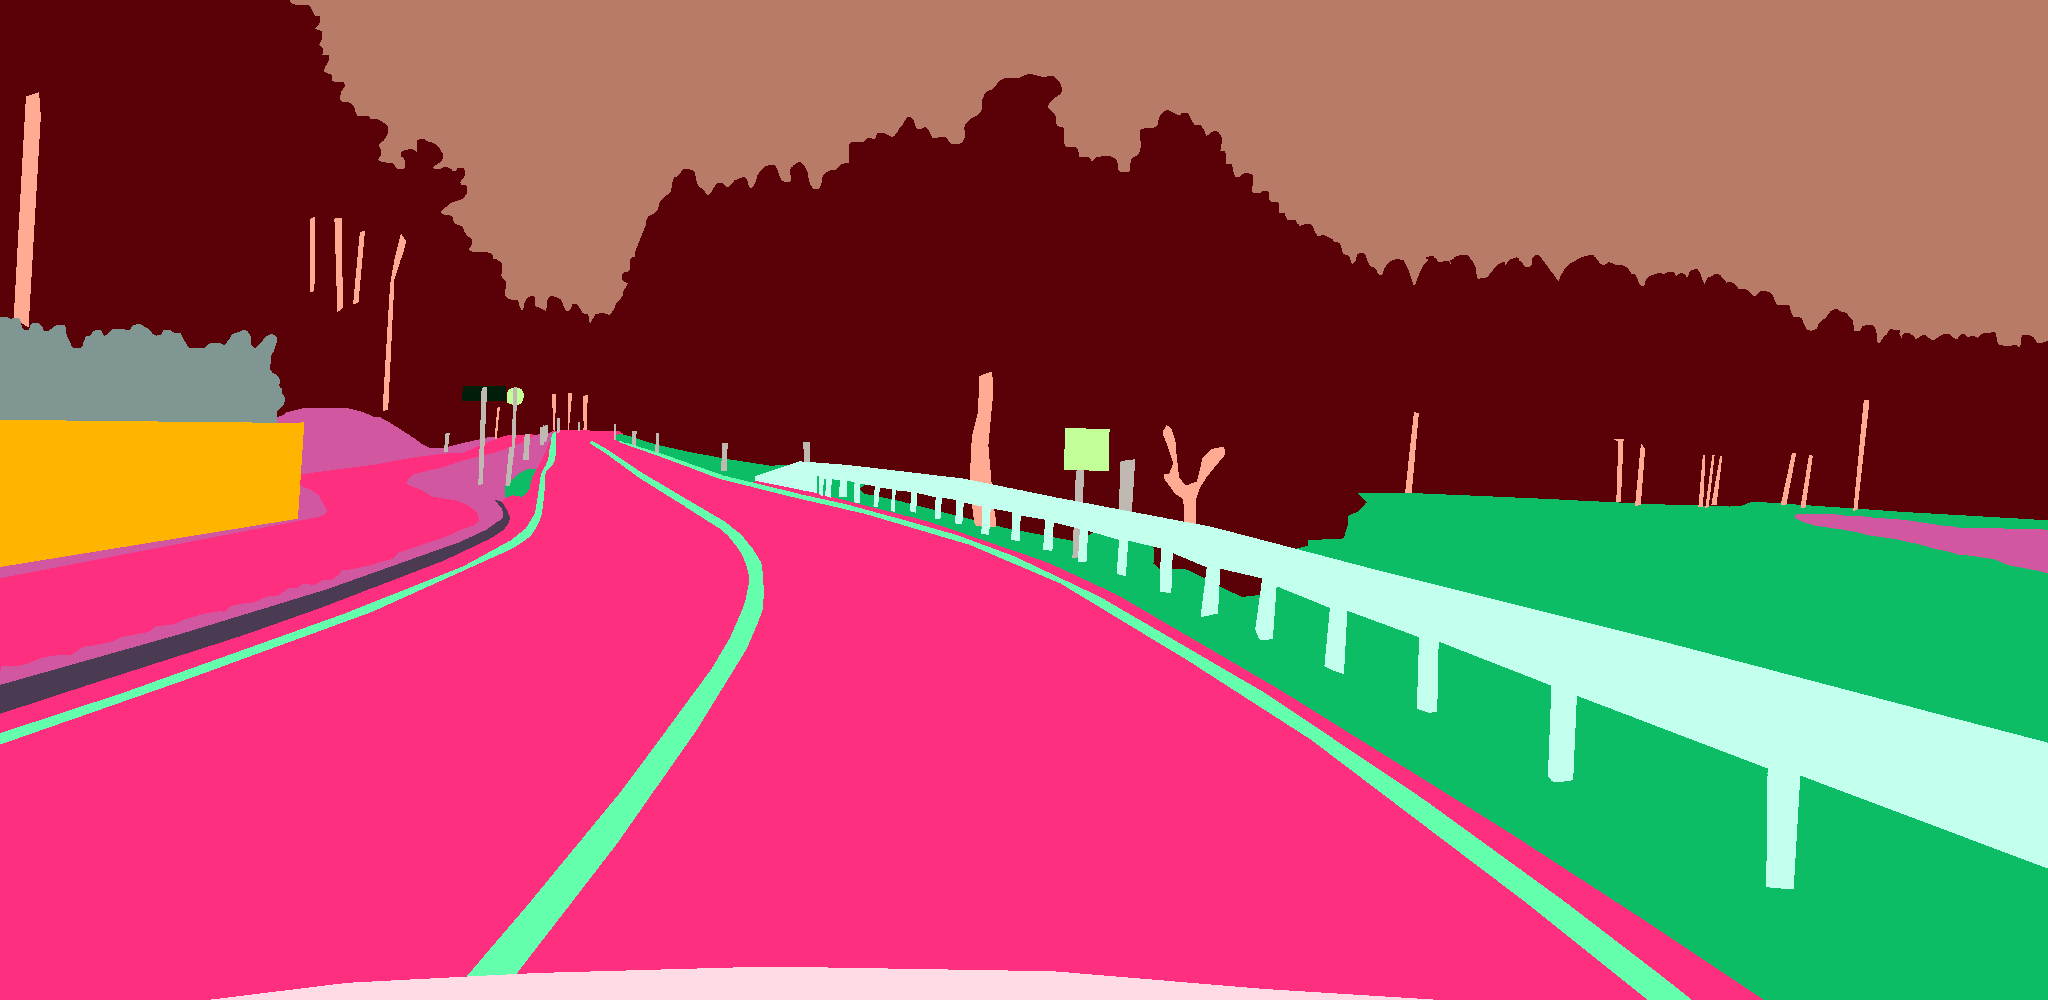

In [63]:
colored_image = Image.fromarray(colored_image)
colored_image

In [64]:
colored_image.save(path.replace(".png", "_color.png"))